In [66]:
#importin the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rc('figure',figsize=(12,6))

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
df = pd.read_csv("Datasets/housing.csv")

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Data Cleaning
#1Missing value
#2 Outliers

In [22]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Mean Imputation

In [23]:
missing_column = ['total_bedrooms']

for i in missing_column:
    df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()

In [24]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Finding Outliers

In [26]:
def detect_outliers(mydata):
    dataoutliers = []
    mydata = sorted(mydata)

    q1 = np.percentile(mydata,0.25)
    q3 = np.percentile(mydata,0.75)
    IQR = q3-q1
    outlier_lwr_bound = q1-(1.5*IQR)
    outlier_upr_bound = q3+(1.5*IQR)

    for i in mydata:
        if (i<outlier_lwr_bound or i>outlier_upr_bound):
            dataoutliers.append(i)
    return dataoutliers


In [28]:
detect_outliers(df['population'])

[122.0,
 122.0,
 123.0,
 124.0,
 124.0,
 125.0,
 125.0,
 125.0,
 125.0,
 126.0,
 126.0,
 128.0,
 128.0,
 129.0,
 129.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 131.0,
 131.0,
 131.0,
 131.0,
 132.0,
 132.0,
 133.0,
 133.0,
 133.0,
 134.0,
 134.0,
 134.0,
 135.0,
 135.0,
 136.0,
 137.0,
 137.0,
 137.0,
 138.0,
 138.0,
 138.0,
 139.0,
 139.0,
 140.0,
 140.0,
 140.0,
 141.0,
 141.0,
 141.0,
 142.0,
 142.0,
 142.0,
 142.0,
 142.0,
 143.0,
 144.0,
 145.0,
 145.0,
 146.0,
 146.0,
 147.0,
 147.0,
 147.0,
 148.0,
 148.0,
 149.0,
 149.0,
 149.0,
 149.0,
 150.0,
 150.0,
 150.0,
 150.0,
 151.0,
 151.0,
 151.0,
 152.0,
 152.0,
 152.0,
 152.0,
 152.0,
 152.0,
 153.0,
 153.0,
 153.0,
 154.0,
 154.0,
 154.0,
 154.0,
 154.0,
 155.0,
 156.0,
 156.0,
 157.0,
 157.0,
 157.0,
 158.0,
 158.0,
 158.0,
 158.0,
 158.0,
 160.0,
 160.0,
 161.0,
 161.0,
 161.0,
 161.0,
 162.0,
 163.0,
 163.0,
 163.0,
 163.0,
 164.0,
 164.0,
 165.0,
 166.0,
 166.0,
 167.0,
 167.0,
 167.0,
 167.0,
 167.0,
 168.0,
 169.0,


In [35]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
collist = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

for i in collist:
    ninetieth_percentile = np.percentile(df[i],90)
    tenth_percentile = np.percentile(df[i],10)
    df[i] = np.where(df[i]>ninetieth_percentile,ninetieth_percentile,df[i])
    df[i] = np.where(df[i]<tenth_percentile,tenth_percentile,df[i])

In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,20640.00,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0000,20640.0
mean,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0
std,2.842240e-14,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
min,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0
25%,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0
50%,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0
75%,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0
max,-1.222900e+02,33.63,13.0,941.0,199.0,510.0,184.0,1.9038,82300.0


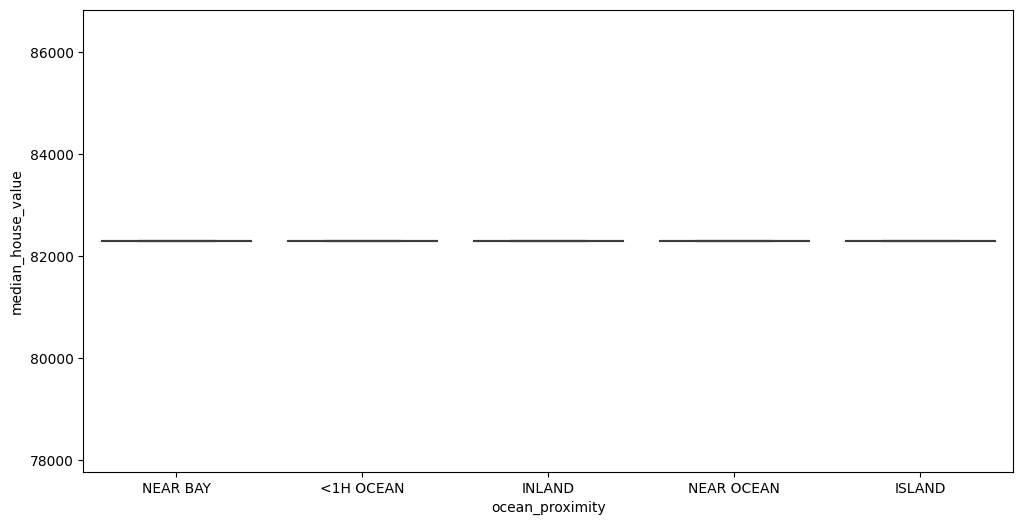

In [68]:
#sns.catplot(data=df,x='ocean_proximity',y='median_house_value',kind='box')
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value')
plt.show()

Feture Engineering